# Applications for Predictive Hockey Models in Pro Scouting

### By Marc Khuri-Yakub
#### BrainStation Diploma Candidate July 2021

## Motivation for this project: 

I am an avid hockey fan and have always enjoyed watching the NHL. In recent years I've felt a desire to dig deeper into the analytics side of the game to see what the data can tell us. Initially my goal was to create a model for line combination generation based on player strengths. That would be finding 3 forwards whose advanced statistics would mesh well together and provide the highest value on the ice. However, that would be akin to running before you could walk, so I moved towards a game prediction model. To begin I went to NaturalStatTrick.com and downloaded several datasets to see what I could learn.

In [1]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import random

## Exploratory Data Analysis:

To begin with, I decided to look at the advanced team stats from the most recent NHL season. 

In [2]:
# Importing in the data from NaturalStatTrick.com for the most recent season using pd.read_csv
team_df_21 = pd.read_csv('data/Team Season Totals - Natural Stat Trick 20-21.csv')

In [3]:
# Taking a look at the shape of the data
team_df_21.shape

(31, 72)

There are currently 31 teams in the NHL, which explains the 31 rows. 72 columns is a lot of advanced statistics, so I have attached a detailed data dictionary from NaturalStatTrick.com [here](https://www.naturalstattrick.com/glossary.php?lines). 

In [4]:
# Using .head to see the layout
team_df_21.head(32)

,Unnamed: 0,Team,GP,TOI,W,L,OTL,ROW,Points,Point %,...,LDSA,LDSF%,LDGF,LDGA,LDGF%,LDSH%,LDSV%,SH%,SV%,PDO
0,1,Pittsburgh Penguins,56,2765.7167,37,16,3,34,77,0.688,...,587,49.53,16,13,55.17,2.78,97.79,9.38,92.50,1.019
1,2,Philadelphia Flyers,56,2716.9667,25,23,8,22,58,0.518,...,572,51.19,11,21,34.38,1.83,96.33,8.26,89.54,0.978
2,3,Chicago Blackhawks,56,2716.9500,24,25,7,22,55,0.491,...,596,46.50,11,15,42.31,2.12,97.48,7.95,91.67,0.996
3,4,Tampa Bay Lightning,56,2628.2333,36,17,3,35,75,0.670,...,479,52.57,16,12,57.14,3.01,97.49,8.43,92.11,1.005
4,5,Montreal Canadiens,56,2736.7167,24,21,11,23,59,0.527,...,512,55.71,14,8,63.64,2.17,98.44,7.50,91.37,0.989
5,6,Toronto Maple Leafs,56,2751.7333,35,14,7,34,77,0.688,...,553,46.15,15,18,45.45,3.16,96.75,9.68,92.36,1.020
6,7,Vancouver Canucks,56,2681.7833,23,29,4,20,50,0.446,...,574,50.30,14,10,58.33,2.41,98.26,7.95,91.11,0.991
7,8,Edmonton Oilers,56,2738.9833,35,19,2,35,72,0.643,...,570,49.20,12,17,41.38,2.17,97.02,8.88,91.56,1.004
8,9,St Louis Blues,56,2739.7167,27,20,9,25,63,0.563,...,557,48.90,14,17,45.16,2.63,96.95,8.23,91.62,0.998
9,10,Colorado Avalanche,56,2641.6333,39,13,4,39,82,0.732,...,448,58.75,20,10,66.67,3.13,97.77,8.87,91.67,1.005


Since I couldn't see all 72 columns with `.head` I decided to use `.info` to see all the column names and their data types. 

In [5]:
# Using .info
team_df_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 72 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  31 non-null     int64  
 1   Team        31 non-null     object 
 2   GP          31 non-null     int64  
 3   TOI         31 non-null     float64
 4   W           31 non-null     int64  
 5   L           31 non-null     int64  
 6   OTL         31 non-null     int64  
 7   ROW         31 non-null     int64  
 8   Points      31 non-null     int64  
 9   Point %     31 non-null     float64
 10  CF          31 non-null     int64  
 11  CA          31 non-null     int64  
 12  CF%         31 non-null     float64
 13  FF          31 non-null     int64  
 14  FA          31 non-null     int64  
 15  FF%         31 non-null     float64
 16  SF          31 non-null     int64  
 17  SA          31 non-null     int64  
 18  SF%         31 non-null     float64
 19  GF          31 non-null     int

# Networking:

At this point, I began scouring the internet for information on how to build hockey models. As hockey analytics are still in their early stages of use, I decided the best course of action would be to reach out to many of the analytics gurus and beat writers I follow on Twitter and LinkedIn. This was easily the most interesting part of my project; cold contacting strangers was never something I anticipated having to do. I reached out to Sheng Peng [@ShengPeng](https://twitter.com/Sheng_Peng) beat writer for the San Jose Sharks, Patrick Bacon [@TopDownHockey](https://twitter.com/TopDownHockey) analytics guru on Twitter, Corey Sznajder [@ShutdownLine](https://twitter.com/ShutdownLine) analytics guru on Twitter, Sean Tierney [@ChartingHockey](https://twitter.com/ChartingHockey) Director of Hockey Services for [@Sportlogiq](https://twitter.com/Sportlogiq), Dom Luszczyszyn [@domluszczyszyn](https://twitter.com/domluszczyszyn) Writer for The Athletic NHL, Micah Blake McCurdy [@IneffectiveMath](https://twitter.com/IneffectiveMath) analytics guru on Twitter, Josh and Luke from [EvolvingHockey](https://twitter.com/EvolvingWild) analytics gurus on Twitter, among others. Several of them were kind enough to respond and guide me towards websites with helpful content as well as ideas on which models to use. 

The most helpful person has actually been Patrick Bacon. He has helped me with some of the issues that I ran into with my code, and double checked to make sure that my first Monte Carlo was accurate. I am also currently a Moderator on [HFboards.com](https://hfboards.mandatory.com/) and would often post his tweets of player valuation models in discussion threads. Another poster on HFboards posted one of his tweets and attributed it to a user on the San Jose Sharks board. I immediately messaged Patrick on twitter asking if he was in fact a poster on the San Jose Sharks HFboards. He said he was, and funnily enough, we had actually known each other for over 5 years and been discussing advanced stats the entire time. 

I have learned a lot by cold contacting people on twitter and LinkedIn. It is an incredibly valuable resource and it is always amazing to see how generous people are with their time and knowledge if you just ask. It is certainly something that I will continue to do going forward. 

# Building a Model:

There were two models that were suggested to me as starting points for getting into hockey analytics. The first was the BradleyTerry Model using the BradleyTerry2 package in R. The second one was creating a Monte Carlo Simulation. I looked into both, but due to my lack of knowledge of R, it seemed like the right choice would be a Monte Carlo. 

I looked into some built in packages for Monte Carlo Simulations in python, but I felt that I needed an overall understanding of what one entailed, so I decided to build some custom ones myself. I began watching sports gambling videos on YouTube that taught how to build a simple Monte Carlo. I learned how to calculate expected scoring rates and save rates that then could be applied to the model and cycle through it 100,000 times. 

For my initial model I decided to go with just 4 stats along with the team names. Save percentage, shooting percentage, shots for a game, and shots against per game. For each team I would have to create an expected shooting percentage and an expected number of shots on goal. I chose to use the San Jose Sharks and Vegas Golden Knights for my initial test. 

To calculate the expected save percentage is as follows:

      a = San Jose Shooting Percentage - League Average Shooting Percentage
      b = Vegas Golden Knights Shooting Percentage against - League Average Shooting Percentage
      a + b + League Average Shooting Percentage = The Expected Shooting percentage for the Sharks against Vegas
      
I would then create expectations for each stat for both teams that I wanted to use in my function. 

## Calculating the Necessary Stats before the Expectations

In [6]:
# Calculating the league average save%
league_average_SV_pct = (round((team_df_21['SV%']).mean(),2))
league_average_SV_pct

91.74

In [7]:
# Calculating the league average shooting% 
league_average_SH_pct = (round((team_df_21['SH%']).mean(),2))
league_average_SH_pct

8.28

In [8]:
# Calculating the San Jose Sharks save percentage using the index number from the dataframe and rounding the number
SJ_SV_pct = round(team_df_21['SV%'][24],2)
SJ_SV_pct

90.37

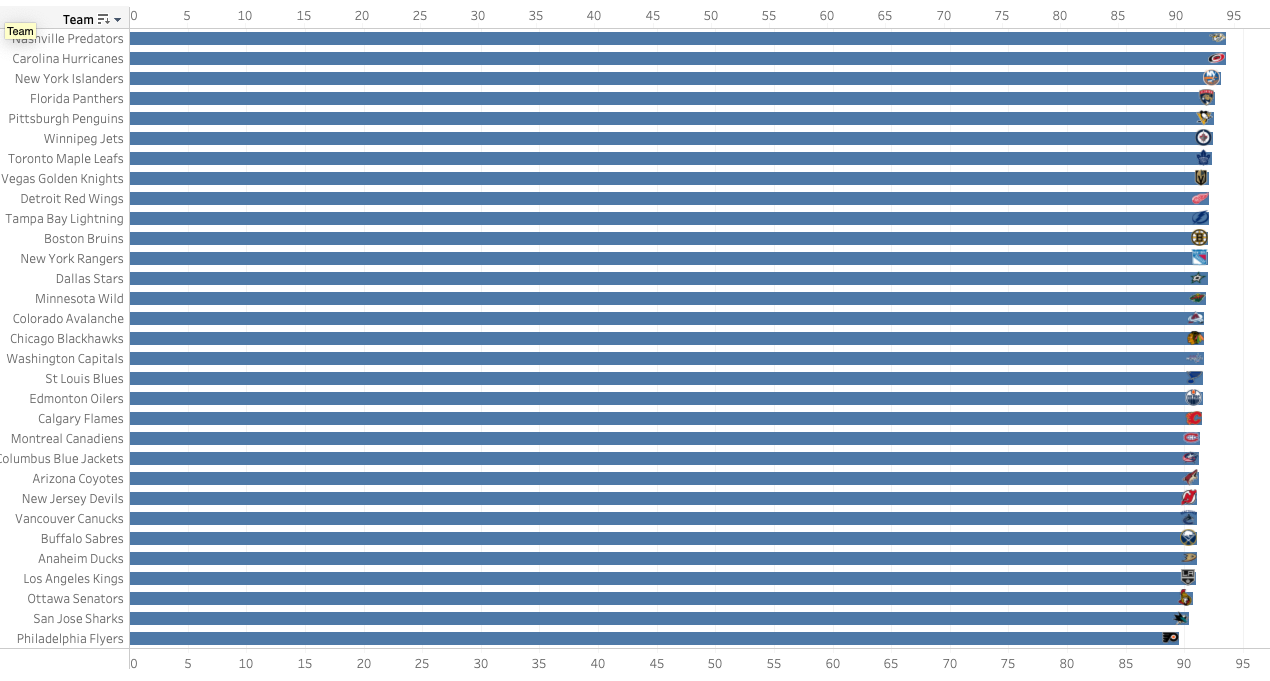

In [9]:
from IPython.display import Image
Image("tableauimage.png")

#### The San Jose Sharks save percentage was near the bottom of the league. 

In [10]:
# Calculating Vegas' save percentage using the index number from the dataframe and rounding the number
VG_SV_pct = round(team_df_21['SV%'][27],2)
VG_SV_pct

92.15

#### We can see the disparity in overall team abilities just based on the markedly better save percentage for Vegas. 

In [11]:
# Calculating the Sharks save percentage compared to the league average
round((SJ_SV_pct - league_average_SV_pct),2)

-1.37

#### The San Jose Sharks goalies were below average, saving 1.3% fewer shots than the average team. 

In [12]:
# Calculating Vegas' save percentage compared to the league average
round((VG_SV_pct - league_average_SV_pct),2)

0.41

#### Vegas' goalies were above average, saving .41% more than the average team. 

In [13]:
# Caluclating the San Jose Sharks shooting percentage using the row index and rounding to 2 decimal places
SJ_Shooting_pct = round(team_df_21['SH%'][24],2)
SJ_Shooting_pct

8.05

In [14]:
# Calculating the Sharks shooting percentage compared to league average
SJ_Shooting_pct - league_average_SH_pct

-0.22999999999999865

#### The Sharks also shot poorly as a team as well. Their shooting percentage is again below league average.  

In [15]:
# Calculating the shooting percentage against the Sharks
SJ_SH_pct_against = 100 - SJ_SV_pct
SJ_SH_pct_against

9.629999999999995

#### Teams shot very well against the San Jose Sharks

In [16]:
# Calculating Vegas' shooting percentage
VG_Shooting_pct = team_df_21['SH%'][27]
VG_Shooting_pct

9.58

In [17]:
VG_Shooting_pct - league_average_SH_pct

1.3000000000000007

In [18]:
# Calculating the shooting percentage against Vegas
VG_SH_pct_against = 100 - VG_SV_pct
VG_SH_pct_against

7.849999999999994

#### Vegas has a very high shooting percentage shooting 1.3% higher than league average. 

In [19]:
# I also need to calculate the save percentage of the opponents of Vegas
VG_SV_pct_against = 100 - VG_Shooting_pct
VG_SV_pct_against

90.42

In [20]:
# Calculating the save percentage against for San Jose
SJ_SV_pct_against = 100 - SJ_Shooting_pct
SJ_SV_pct_against

91.95

#### Now I need to calculate the number of shots generated by each team. 

In [21]:
# Calculating the number of shots the Sharks averaged per game. 
SJ_Shots_per_game = ((team_df_21['SF'][24]/56))
SJ_Shots_per_game

23.303571428571427

#### San Jose generated 23.3 shots per game, which will be rounded down to 23. 

In [22]:
# Calculating the number of shots the Vegas Golden Knights averaged per game.
VG_Shots_per_game = ((team_df_21['SF'][27]/56))
VG_Shots_per_game

25.160714285714285

#### Vegas generated 25.1 shots per game, which will be rounded down to 25. 

In [23]:
# Calculating the league average shots per game. I had to divide by 56 which is the total number of games played
# by each NHL team.
league_average_shot_per_game = ((team_df_21['SF'].mean())/56)
league_average_shot_per_game

23.58179723502304

#### The league average for shots per game is 23.58. 

In [24]:
# Calculating the league average shots against per game. This one was actually funny, because obviously
# it has to be the same number as shots for across the entire league. 
league_average_shot_against_game = ((team_df_21['SA'].mean())/56)
league_average_shot_against_game

23.58179723502304

In [25]:
# Calculating how many shots Vegas allowed per game. 
VG_Shots_against_game = ((team_df_21['SA'][27]/56))
VG_Shots_against_game

22.053571428571427

#### Vegas allowed only 22 shots against per game. 

In [26]:
# Calculating how many shots the Sharks allowed per game. 
SJ_Shots_against_game = ((team_df_21['SA'][24]/56))
SJ_Shots_against_game

24.839285714285715

#### San Jose allowed 24.8 shots against per game which will be rounded to 25. 

## Calculating the expectations

In [27]:
# Calculating Vegas' expected shooting percentage against the Sharks
# Using Vegas' shooting% - the league average shooting% +
# San Jose's shooting% against - the league average shooting% +
# the league average shooting percentage
(round((VG_Shooting_pct - league_average_SH_pct),2)) + (round((SJ_SH_pct_against - league_average_SH_pct),2)) + league_average_SH_pct


10.93

#### Vegas has an expected shooting percentage of 10.93% against the Sharks. 

In [28]:
# Calculating the Sharks' expected shooting percentage against the Golden Knights
(round((SJ_Shooting_pct - league_average_SH_pct),2)) + (round((VG_SH_pct_against - league_average_SH_pct),2)) + league_average_SH_pct


7.619999999999999

#### San Jose has an expected shooting percentage of 7.62% against Vegas. 

We can already see that there is a quite a discrepancy between the two teams just in terms of shooting percentage. 

In [29]:
# Calculating the Sharks' expected shots on goal against Vegas
(round(((round((SJ_Shots_per_game - league_average_shot_per_game),2)) 
  + (round((VG_Shots_against_game - league_average_shot_against_game),2)) + league_average_shot_per_game),0))

22.0

#### San Jose will generate 22 shots against Vegas.

In [30]:
# Calculating the Golden Knights' expected shots on goal against San Jose
(round(((round((VG_Shots_per_game - league_average_shot_per_game),2)) 
  + (round((SJ_Shots_against_game - league_average_shot_against_game),2)) + league_average_shot_per_game),0))

26.0

#### Vegas will generate 26 shots againt the Sharks.

## Building the Function to Run a Basic Model

Now that I have the data for my basic Monte Carlo, I decided to first build a basic 1 game simulation. 

In [31]:
# Defining the function using the teams, their shots in a game and their shooting percentages. 
# Since I manually calculated all this information, I will have to again enter it in myself.
def Monte_Carlo_sim(team1, team2, team1_shots, team2_shots, team1sh_pct, team2sh_pct):
    # Creating a list for goals scored by the teams
    goals_scored_team1 = 0
    goals_scored_team2 = 0
    # Also creating a victory tally if I wanted to do a cumulative total
    team1_victories = 0
    team2_victories = 0
    
    # Setting up a for loop to run over the number of shots each team would generate
    for k in range(1, team1_shots):
        # using np.random.random to pick a random float between 0 and 1
        r = np.random.random()
        if(r<=team1sh_pct):
            # if the float is below the team's expected shooting percentage, they scored a goal
            # otherwise, no goal is scored
            goals_scored_team1 += 1
        else:
            goals_scored_team1 += 0
        
    # Setting up the for loop for the second team following the same parameters as above  
    for k in range(1, team2_shots):
        r = np.random.random()
        if(r<=team2sh_pct):
            goals_scored_team2 += 1
        else: 
            goals_scored_team2 += 0
    
    # using the goal scored totals to find out who the winner is.
    # If team1 scores more than team2 they are the winner and vice versa. 
    # If the scores ends in a tie the game will go to overtime. 
    if goals_scored_team1 > goals_scored_team2:
        print(f"{team1} wins")
        team1_victories +=1
    elif goals_scored_team2 > goals_scored_team1:
        print(f"{team2} wins")
        team2_victories +=1
    elif goals_scored_team1 == goals_scored_team2:
        print("Overtime")
    # Setting up a print statement with an F string 
    print(f'{team1} {goals_scored_team1}, {team2} {goals_scored_team2}, {team1} victories = {team1_victories}, {team2} victories = {team2_victories} ')
    # in the end I decided not to do a cumulative count of wins

In [32]:
# Testing out the function to see how it works

Monte_Carlo_sim('San Jose Sharks', 'Vegas Golden Knights', 22, 26, .0762, .1093) 

Vegas Golden Knights wins
San Jose Sharks 0, Vegas Golden Knights 3, San Jose Sharks victories = 0, Vegas Golden Knights victories = 1 


## IT WORKS! 

Great, now to build a function and model that runs the simulation 100,000 times. I took my original function and built it up to track total victories, and calculate the percentage of the time that each team would win. 

In [33]:
# defining a Monte Carlo simulation
def Monte_Carlo_sim_prob(team1, team2, team1_shots, team2_shots, team1sh_pct, team2sh_pct):
    # Creating a tally of victories for each team and the number of games that go to overtime
    team1_victories = 0
    team2_victories = 0
    overtime = 0 
    # Creating a for loop that runs 100,000 simulations of the game    
    for i in range(0, 100000):
        # Goals scored for each team
        goals_scored_team1 = 0
        goals_scored_team2 = 0
        # A for loop for team1 shot attempts and outcomes
        for k in range(0, team1_shots):
            # using np.random.random to generate random floats between 1 and 0
            # if the number hits below the shooting percentage threshold then a goal is scored
            # otherwise the shot is saved by the goalie.
            # I could have done the exact same thing with save percentages for the opposing goalies
            # If the number was higher than the save perecentage, then a goal was scored.
            r = np.random.random()
            if(r<=team1sh_pct):
                # Adding a goal if the shot falls below the set shooting percentage
                goals_scored_team1 += 1
                # Shot is saved, no goal is added
            else:
                goals_scored_team1 += 0


        for k in range(0, team2_shots):
            # Running the same for loop for team 2
            r = np.random.random()
            if(r<=team2sh_pct):
                goals_scored_team2 += 1
            else: 
                goals_scored_team2 += 0
                
        # Calculating which team won the game
        # If team1 scored more, they get a victory
        if goals_scored_team1 > goals_scored_team2:
        # The victory is added to their total victories
            team1_victories += 1
        # The same is done for team 2
        if goals_scored_team2 > goals_scored_team1:
            team2_victories += 1
        # the score is tied, the game goes into overtime
        if goals_scored_team1 == goals_scored_team2:
            overtime +=1 
    # Printing the percent chance of team 1 winning, team 2 winning, and the game going to overtime
    print(f'{team1} chances of winning:',team1_victories/1000,'%','\n'
    f'{team2} chances of winning:',team2_victories/1000,'%','\n'
    f'Percent chance the game will go to overtime:',overtime/1000,'%','\n')

In [34]:
# Sample of the function with 100,000 games between San Jose and Vegas
Monte_Carlo_sim_prob('San Jose Sharks', 'Vegas Golden Knights', 23, 27, .0762, .1093) 

San Jose Sharks chances of winning: 19.931 % 
Vegas Golden Knights chances of winning: 63.136 % 
Percent chance the game will go to overtime: 16.933 % 



## Awesome! 

So now I am able to run a Monte Carlo simulation 100,000 times using just shooting percentage and shots generated for each team to make a prediction on who might win the game. A good start, but now the fun begins. 

There are a few things that I would like to add to make the model more predictive and more robust. 

First I'd like to break down the shots by location. There are three offensive zone shot areas labeled low danger, high danger and medium danger areas. 

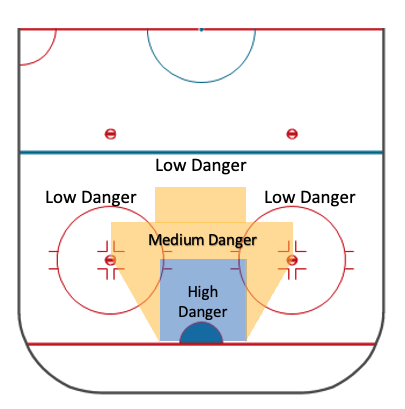

In [35]:
from IPython.display import Image
Image("shotlocations.png")

In order to do this, and increase my ease of processing I will create a new dataframe. In my new `Monte_carlo_df` I will use the team names, shooting percentage, save percentage, shots for, shots against, low danger shots for, low danger shots against, low danger save percentage, low danger shooting percentage, medium danger shots for, medium danger shots against, medium danger save percentage, medium danger shooting percentage, high danger shots for, high danger shots against, high danger save percentage and high danger shooting percentage. 

I also want to make my new Monte Carlo simulation only require the team names for the two teams to be entered, so I will set the index to the team names. 

In [36]:
# Creating the new dataframe and selecting only the columns that I need
Monte_carlo_df = team_df_21[['Team', 'SH%','SV%', 'SF','SA','LDSF', 'LDSA', 'LDSV%',
                             'LDSH%', 'MDSF', 'MDSA', 'MDSV%', 'MDSH%',
                             'HDSF', 'HDSA', 'HDSV%', 'HDSH%']]

In [37]:
# Changing the index to the 'Team' column
Monte_carlo_df.set_index("Team", inplace=True)

In [38]:
# Taking a look at the new dataframe. I didn't need to use .head() because the dataframe is now quite small. 
Monte_carlo_df

,SH%,SV%,SF,SA,LDSF,LDSA,LDSV%,LDSH%,MDSF,MDSA,MDSV%,MDSH%,HDSF,HDSA,HDSV%,HDSH%
Team,,,,,,,,,,,,,,,,
Pittsburgh Penguins,9.38,92.50,1343,1333,576,587,97.79,2.78,354,307,92.18,8.76,351,378,83.33,21.94
Philadelphia Flyers,8.26,89.54,1307,1281,600,572,96.33,1.83,323,305,87.54,9.91,322,351,78.92,20.19
Chicago Blackhawks,7.95,91.67,1258,1501,518,596,97.48,2.12,352,401,92.77,9.38,335,442,81.67,16.72
Tampa Bay Lightning,8.43,92.11,1317,1230,531,479,97.49,3.01,384,365,90.14,7.03,360,332,85.24,18.89
Montreal Canadiens,7.50,91.37,1414,1193,644,512,98.44,2.17,377,299,88.29,7.43,338,311,80.71,18.93
Toronto Maple Leafs,9.68,92.36,1364,1243,474,553,96.75,3.16,434,331,92.75,9.91,421,301,82.39,17.58
Vancouver Canucks,7.95,91.11,1295,1474,581,574,98.26,2.41,331,453,90.73,11.48,302,394,79.95,16.89
Edmonton Oilers,8.88,91.56,1295,1374,552,570,97.02,2.17,339,402,90.05,14.16,341,334,82.34,15.54
St Louis Blues,8.23,91.62,1240,1300,533,557,96.95,2.63,365,358,91.34,8.22,280,331,81.57,20.71


In [39]:
# Looking at the shape
Monte_carlo_df.shape

(31, 16)

The dataframe is now only 31 rows and 17 columns which is much easier to work with. 

In [40]:
# Checking the info from the new dataframe
Monte_carlo_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, Pittsburgh Penguins to Ottawa Senators
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SH%     31 non-null     float64
 1   SV%     31 non-null     float64
 2   SF      31 non-null     int64  
 3   SA      31 non-null     int64  
 4   LDSF    31 non-null     int64  
 5   LDSA    31 non-null     int64  
 6   LDSV%   31 non-null     float64
 7   LDSH%   31 non-null     float64
 8   MDSF    31 non-null     int64  
 9   MDSA    31 non-null     int64  
 10  MDSV%   31 non-null     float64
 11  MDSH%   31 non-null     float64
 12  HDSF    31 non-null     int64  
 13  HDSA    31 non-null     int64  
 14  HDSV%   31 non-null     float64
 15  HDSH%   31 non-null     float64
dtypes: float64(8), int64(8)
memory usage: 4.1+ KB


#### Again, just checking to make sure there aren't any mistakes or surprises in my new dataframe.

#### I will now do my calculations before I enter them into the function, starting with the league averages. 

In [41]:
# Calculating league average High Danger Save Percentage
league_avg_hdsv_pct = Monte_carlo_df['HDSV%'].mean()
league_avg_hdsv_pct

82.07870967741937

In [42]:
# Calculating league average Medium Danger Save Percentage
league_avg_mdsv_pct = (round((Monte_carlo_df['MDSV%'].mean()),2))
league_avg_mdsv_pct

90.85

In [43]:
# Calculating league average Low Danger Save Percentage
league_avg_ldsv_pct = Monte_carlo_df['LDSV%'].mean()
league_avg_ldsv_pct

97.31806451612904

In [44]:
# Calculating league average High Danger Shots per game
league_hdshots_per_game = (Monte_carlo_df['HDSF'].sum()/(team_df_21['GP'].sum()))

league_hdshots_per_game

6.1054147465437785

In [45]:
# Calculating league average Medium Danger Shots per game
league_mdshots_per_game = (Monte_carlo_df['MDSF'].sum()/(team_df_21['GP'].sum()))

league_mdshots_per_game

6.32258064516129

In [46]:
# Calculating league average Low Danger Shots per game
league_ldshots_per_game = (Monte_carlo_df['LDSF'].sum()/(team_df_21['GP'].sum()))

league_ldshots_per_game

10.099078341013826

In [47]:
# Calculating league average Medium Danger Shooting Percentage
league_avg_md_shoot_pct = (round((Monte_carlo_df['MDSH%']).mean(),2))
league_avg_md_shoot_pct

9.15

In [48]:
# Calculating league average High Danger Shooting Percentage
league_avg_hd_shoot_pct = (round((Monte_carlo_df['HDSH%']).mean(),2))
league_avg_hd_shoot_pct

18.0

In [49]:
# Calculating league average Low Danger Shooting Percentage
league_avg_ld_shoot_pct = (round((Monte_carlo_df['LDSH%']).mean(),2))
league_avg_ld_shoot_pct

2.7

Now I just want to do a little verification that changing the index to the team names will allow me to easily select the statistics from each team inside the new function. 

In [50]:
# Using .loc to select all the stats from the Sharks
Monte_carlo_df.loc['San Jose Sharks']

SH%         8.05
SV%        90.37
SF       1305.00
SA       1391.00
LDSF      489.00
LDSA      595.00
LDSV%      96.13
LDSH%       3.07
MDSF      368.00
MDSA      371.00
MDSV%      90.03
MDSH%       7.61
HDSF      403.00
HDSA      367.00
HDSV%      79.84
HDSH%      15.38
Name: San Jose Sharks, dtype: float64

In [51]:
# Again using .loc for the stats from Vegas. 
Monte_carlo_df.loc['Vegas Golden Knights']

SH%         9.58
SV%        92.15
SF       1409.00
SA       1235.00
LDSF      553.00
LDSA      490.00
LDSV%      97.55
LDSH%       3.62
MDSF      411.00
MDSA      319.00
MDSV%      91.22
MDSH%      10.95
HDSF      386.00
HDSA      353.00
HDSV%      83.85
HDSH%      17.88
Name: Vegas Golden Knights, dtype: float64

In [52]:
# Now parsing the stats and dividing by the number of games played to see how many Low Danger Shots For Vegas averaged
# last year
Monte_carlo_df.loc['Vegas Golden Knights']['LDSF']/56

9.875

In [53]:
# Calculating how much worse the Sharks Medium Save Percentage was than the league average
Monte_carlo_df.loc['San Jose Sharks']['MDSV%'] - league_avg_mdsv_pct

-0.8199999999999932

In [54]:
# Calling Vegas' Medium Danger Shooting Percentage
Monte_carlo_df.loc['Vegas Golden Knights']['MDSH%']

10.95

In [55]:
# By subtracting the Mediumn Danger Shooting Percentage from 100 
# I am able to calculate the Medium Danger Save Percentage against Vegas
100 - Monte_carlo_df.loc['Vegas Golden Knights']['MDSH%']

89.05

In [56]:
# Calculating how much better Vegas' Medium Danger Shooting Percentage as than league average. 
Monte_carlo_df.loc['Vegas Golden Knights']['MDSH%'] - league_avg_md_shoot_pct

1.799999999999999

In [57]:
# Calculating how much better Vegas shoots than league average on Mediumn Danger shots. 
(100-Monte_carlo_df.loc['Vegas Golden Knights']['MDSH%']) - (100-league_avg_md_shoot_pct)

-1.7999999999999972

# Building a More Robust Monte Carlo Simulation:

Now that I have my new dataframe I can being to calculate the expectations within the new function. 

In [58]:
# Creating the function, the only require information will be the team names.
def monte_carlo_matchup(team1, team2):
    # Entering an assert statement to make sure the team name entered is a valid NHL team. 
    assert team1 in Monte_carlo_df.index, 'Team1 is not a valid NHL team name. Please enter a valid NHL team'
    assert team2 in Monte_carlo_df.index, 'Team2 is not a valid NHL team name. Please enter a valid NHL team'
        
    # Setting up the connection between the entered team name and the data in the dataframe
    team1 = Monte_carlo_df.loc[team1]
    team2 = Monte_carlo_df.loc[team2]
    # Setting up a connection to be used in the calculations so the data can be extracted from the team name
    # with a .loc
    team1_name = team1.name
    team2_name = team2.name

    # Calculating the league average statistics
    league_avg_hdsv_pct = (round((Monte_carlo_df['HDSV%'].mean()),2))

    league_avg_mdsv_pct = (round((Monte_carlo_df['MDSV%'].mean()),2))

    league_avg_ldsv_pct = (round((Monte_carlo_df['LDSV%'].mean()),2))
    # Here I used the the sum of GP from my original dataframe
    league_hdshots_per_game = (Monte_carlo_df['HDSF'].sum()/(team_df_21['GP'].sum()))

    league_mdshots_per_game = (Monte_carlo_df['MDSF'].sum()/(team_df_21['GP'].sum()))

    league_ldshots_per_game = (Monte_carlo_df['LDSF'].sum()/(team_df_21['GP'].sum()))

    league_avg_md_shoot_pct = (round((Monte_carlo_df['MDSH%']).mean(),2))

    league_avg_hd_shoot_pct = (round((Monte_carlo_df['HDSH%']).mean(),2))

    league_avg_ld_shoot_pct = (round((Monte_carlo_df['LDSH%']).mean(),2))
    
    
    
    
    # Calculating the expected stats for each team based on their opponenet and vice versa
    team1_expected_ldsv_pct = (((Monte_carlo_df.loc[team1_name]['LDSV%'] - league_avg_ldsv_pct) + 
                              ((100-Monte_carlo_df.loc[team2_name]['LDSH%']) - (100-league_avg_ld_shoot_pct))
                               + league_avg_ldsv_pct)/100)


    team2_expected_ldsv_pct = (((Monte_carlo_df.loc[team2_name]['LDSV%'] - league_avg_ldsv_pct) +
                              ((100-Monte_carlo_df.loc[team1_name]['LDSH%']) - (100-league_avg_ld_shoot_pct)) +
                               league_avg_ldsv_pct)/100)
    
    
    team1_expected_mdsv_pct = (((Monte_carlo_df.loc[team1_name]['MDSV%'] - league_avg_mdsv_pct) + 
                              ((100-Monte_carlo_df.loc[team2_name]['MDSH%']) - (100-league_avg_md_shoot_pct)) 
                               + league_avg_mdsv_pct)/100)


    team2_expected_mdsv_pct = (((Monte_carlo_df.loc[team2_name]['MDSV%'] - league_avg_mdsv_pct) + 
                              ((100-Monte_carlo_df.loc[team1_name]['MDSH%']) - (100-league_avg_md_shoot_pct)) +
                                league_avg_mdsv_pct)/100)
                                
        
    team1_expected_hdsv_pct = (((Monte_carlo_df.loc[team1_name]['HDSV%'] - league_avg_hdsv_pct) + 
                              ((100-Monte_carlo_df.loc[team2_name]['HDSH%']) - (100-league_avg_hd_shoot_pct)) 
                               + league_avg_hdsv_pct)/100)


    team2_expected_hdsv_pct = (((Monte_carlo_df.loc[team2_name]['HDSV%'] - league_avg_hdsv_pct) + 
                              ((100-Monte_carlo_df.loc[team1_name]['HDSH%']) - (100-league_avg_hd_shoot_pct)) +
                                league_avg_hdsv_pct)/100)
                                   
        
    team1_expected_ldshots_game = (round((((((Monte_carlo_df.loc[team1_name]['LDSF']/56) - league_ldshots_per_game) +
                                  ((Monte_carlo_df.loc[team2_name]['LDSA']/56) - league_ldshots_per_game)) +
                                    league_ldshots_per_game)),0)).astype(int)                                               
    
    
    team1_expected_mdshots_game = (round((((((Monte_carlo_df.loc[team1_name]['MDSF']/56) - league_mdshots_per_game) +
                                  ((Monte_carlo_df.loc[team2_name]['MDSA']/56) - league_mdshots_per_game)) +
                                    league_mdshots_per_game)),0)).astype(int)              
    
    
    team1_expected_hdshots_game = (round((((((Monte_carlo_df.loc[team1_name]['HDSF']/56) - league_hdshots_per_game) +
                                  ((Monte_carlo_df.loc[team2_name]['HDSA']/56) - league_hdshots_per_game)) +
                                    league_hdshots_per_game)),0)).astype(int)   
    
    
    team2_expected_ldshots_game = (round((((((Monte_carlo_df.loc[team2_name]['LDSF']/56) - league_ldshots_per_game) +
                                  ((Monte_carlo_df.loc[team1_name]['LDSA']/56) - league_ldshots_per_game)) +
                                    league_ldshots_per_game)),0)).astype(int)                                               
    
    
    team2_expected_mdshots_game = (round((((((Monte_carlo_df.loc[team2_name]['MDSF']/56) - league_mdshots_per_game) +
                                  ((Monte_carlo_df.loc[team1_name]['MDSA']/56) - league_mdshots_per_game)) +
                                    league_mdshots_per_game)),0)).astype(int)              
    
    
    team2_expected_hdshots_game = (round((((((Monte_carlo_df.loc[team2_name]['HDSF']/56) - league_hdshots_per_game) +
                                  ((Monte_carlo_df.loc[team1_name]['HDSA']/56) - league_hdshots_per_game)) +
                                    league_hdshots_per_game)),0)).astype(int)   
    
    # Creating tallies for all of the stats I want to track
    total_goals_team1 = 0
    total_goals_team2 = 0
    goals_scored_onld_team1 = 0
    goals_scored_onld_team2 = 0
    goals_scored_onmd_team1 = 0
    goals_scored_onmd_team2 = 0
    goals_scored_onhd_team1 = 0
    goals_scored_onhd_team2 = 0
    team1_victories = 0
    team2_victories = 0
    overtime = 0 
    # Creating a for loop that runs 100,000 simulations of the game    
    for i in range(0, 100000):
        # Goals scored for each team
        goals_scored_team1 = 0
        goals_scored_team2 = 0
        # A for loop for team1 shot attempts and outcomes
        for k in range(0, team1_expected_ldshots_game + 1):
            # using np.random.random to generate random floats between 1 and 0
            # if the number hits above the save percentage threshold then a goal is scored
            # otherwise the shot is saved by the goalie.
            
            r = np.random.random()
            if(r>=team2_expected_ldsv_pct):
                # Adding a goal if the shot falls below the set shooting percentage
                goals_scored_team1 += 1
                goals_scored_onld_team1 += 1
                total_goals_team1 += 1
                # Shot is saved, no goal is added
            else:
                goals_scored_team1 += 0

                
        for k in range(0, team1_expected_mdshots_game + 1):
            # using np.random.random to generate random floats between 1 and 0
            # if the number hits above the save percentage threshold then a goal is scored
            # otherwise the shot is saved by the goalie.
            
            r = np.random.random()
            if(r>=team2_expected_mdsv_pct):
                # Adding a goal if the shot falls below the set shooting percentage
                goals_scored_team1 += 1
                goals_scored_onmd_team1 += 1
                total_goals_team1 += 1
                # Shot is saved, no goal is added
            else:
                goals_scored_team1 += 0
       
                
        for k in range(0, team1_expected_hdshots_game + 1):
            # using np.random.random to generate random floats between 1 and 0
            # if the number hits above the save percentage threshold then a goal is scored
            # otherwise the shot is saved by the goalie.
            
            
            r = np.random.random()
            if(r>=team2_expected_hdsv_pct):
                # Adding a goal if the shot falls below the set shooting percentage
                goals_scored_team1 += 1
                goals_scored_onhd_team1 += 1
                total_goals_team1 += 1
                # Shot is saved, no goal is added
            else:
                goals_scored_team1 += 0
      
                
                

        for k in range(0, team2_expected_ldshots_game + 1):
            # Running the same for loop for team 2
            r = np.random.random()
            if(r>=team1_expected_ldsv_pct):
                goals_scored_team2 += 1
                goals_scored_onld_team2 += 1
                total_goals_team2 += 1
            else: 
                goals_scored_team2 += 0
                
        for k in range(0, team2_expected_mdshots_game + 1):
            # Running the same for loop for team 2
            r = np.random.random()
            if(r>=team1_expected_mdsv_pct):
                goals_scored_team2 += 1
                goals_scored_onmd_team2 +=1
                total_goals_team2 += 1
            else: 
                goals_scored_team2 += 0
                
        for k in range(0, team2_expected_hdshots_game + 1):
            # Running the same for loop for team 2
            r = np.random.random()
            if(r>=team1_expected_hdsv_pct):
                goals_scored_team2 += 1
                goals_scored_onhd_team2 +=1
                total_goals_team2 += 1
            else: 
                goals_scored_team2 += 0
                
                
        # Calculating which team won the game
        # If team1 scored more, they get a victory
        if goals_scored_team1 > goals_scored_team2:
        # The victory is added to their total victories
            team1_victories += 1
        # The same is done for team 2
        if goals_scored_team2 > goals_scored_team1:
            team2_victories += 1
        # the score is tied, the game goes into overtime
        if goals_scored_team1 == goals_scored_team2:
            overtime +=1 

    
    # Creating a dataframe to make the odds of winning easier to see for each team
    team1_chance = team1_victories/1000
    team2_chance = team2_victories/1000
    overtime_chance = overtime/1000
    # Setting up the colums and rows with the data from the simulation
    odds = {"Team": [team1_name, team2_name, "Overtime"], "Chance of Winning": [team1_chance, team2_chance, overtime_chance]}
    # Creating a dataframe from the new data
    odds_df = pd.DataFrame(data = odds)
    # Setting the index as the Team column
    odds_df = odds_df.set_index("Team")
    # Displaying the dataframe
    display(odds_df)
    
    # Creating a plot using a horizontal bar chart so the results are easy to process
    plt.figure()
    odds_df.iloc[0:3].plot(kind='barh', figsize=(10,5), fontsize=12, xticks = (np.arange(0, 70, step=10)))
    plt.gca().invert_yaxis()
    plt.xlabel('Chance of winning', fontsize=12)
    plt.ylabel('Team', fontsize=12)
    for index, value in enumerate(odds_df['Chance of Winning']):
        plt.text(value, index, str(value), fontsize=12)
    plt.title(f'Monte Carlo Simulation for the matchup between the {team1_name} and the {team2_name}')
    plt.show()
    
    
    
    
    # Printing the percent chance of team 1 winning, team 2 winning, and the game going to overtime
    # as well as the goals and shots per game by each team, the goals scored in the different danger areas per game
    # and the percentage of goals scored by danger location
    print(f'{team1_name} chances of winning:',team1_victories/1000,'%','\n'
          f'{team2_name} chances of winning:',team2_victories/1000,'%','\n'
          f'Percent chance the game will go to overtime:',overtime/1000,'%','\n',
          '\n',
          f'Low Danger shots per game by {team1_name}:', team1_expected_ldshots_game,'\n','\n',
          f'Medium Danger shots per game by {team1_name}:', team1_expected_mdshots_game,'\n','\n',
          f'High Danger shots per game by {team1_name}:', team1_expected_hdshots_game,'\n','\n',
          f'Low Danger shots per game by {team2_name}:', team2_expected_ldshots_game,'\n','\n',
          f'Medium Danger shots per game by {team2_name}:', team2_expected_mdshots_game,'\n','\n',
          f'High Danger shots per game by {team2_name}:', team2_expected_hdshots_game,'\n','\n',
          f'Goals per game scored by the {team1_name}:', total_goals_team1/100000, '\n','\n',
          f'Goals per game scored by the {team2_name}:', total_goals_team2/100000, '\n','\n',
          f'Low danger goals per game scored by {team1_name}:', goals_scored_onld_team1/100000, '\n','\n',
          f'Medium danger goals per game scored by {team1_name}:', goals_scored_onmd_team1/100000, '\n','\n',
          f'High danger goals per game scored by {team1_name}:', goals_scored_onhd_team1/100000, '\n','\n',
          f'Low danger goals per game scored by {team2_name}:', goals_scored_onld_team2/100000, '\n','\n',
          f'Medium danger goals per game scored by {team2_name}:', goals_scored_onmd_team2/100000, '\n','\n',
          f'High danger goals per game scored by {team2_name}:', goals_scored_onhd_team2/100000, '\n','\n',
          f'Percent of total goals scored on Low danger shots by {team1_name}:', round(((goals_scored_onld_team1/total_goals_team1)*100),2), '\n','\n',
          f'Percent of total goals scored on Low danger shots by {team2_name}:', round(((goals_scored_onld_team2/total_goals_team2)*100),2), '\n','\n',
          f'Percent of total goals scored on Medium danger shots by {team1_name}:', round(((goals_scored_onmd_team1/total_goals_team1)*100),2), '\n','\n',
          f'Percent of total goals scored on Medium danger shots by {team2_name}:', round(((goals_scored_onmd_team2/total_goals_team2)*100),2), '\n','\n',
          f'Percent of total goals scored on High danger shots by {team1_name}:', round(((goals_scored_onhd_team1/total_goals_team1)*100),2), '\n','\n',
          f'Percent of total goals scored on High danger shots by {team2_name}:', round(((goals_scored_onhd_team2/total_goals_team2)*100),2), '\n','\n',)

Now that we've built the function, let's test it by running it with several different teams. 

,Chance of Winning
Team,
Washington Capitals,42.173
Boston Bruins,37.239
Overtime,20.588


<Figure size 432x288 with 0 Axes>

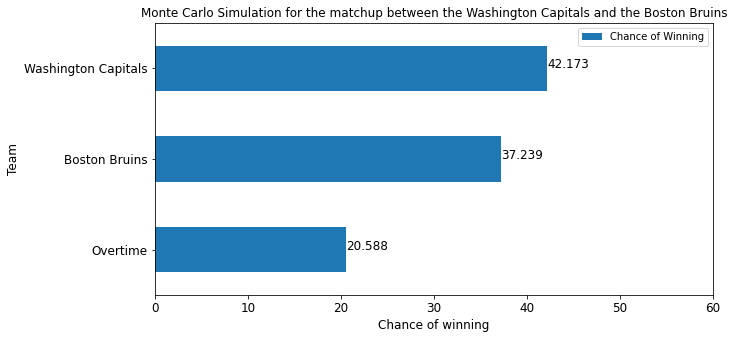

Washington Capitals chances of winning: 42.173 % 
Boston Bruins chances of winning: 37.239 % 
Percent chance the game will go to overtime: 20.588 % 
 
 Low Danger shots per game by Washington Capitals: 9 
 
 Medium Danger shots per game by Washington Capitals: 5 
 
 High Danger shots per game by Washington Capitals: 5 
 
 Low Danger shots per game by Boston Bruins: 12 
 
 Medium Danger shots per game by Boston Bruins: 7 
 
 High Danger shots per game by Boston Bruins: 5 
 
 Goals per game scored by the Washington Capitals: 2.30211 
 
 Goals per game scored by the Boston Bruins: 2.17823 
 
 Low danger goals per game scored by Washington Capitals: 0.52263 
 
 Medium danger goals per game scored by Washington Capitals: 0.61858 
 
 High danger goals per game scored by Washington Capitals: 1.1609 
 
 Low danger goals per game scored by Boston Bruins: 0.35782 
 
 Medium danger goals per game scored by Boston Bruins: 0.66915 
 
 High danger goals per game scored by Boston Bruins: 1.15126 
 
 

In [59]:
monte_carlo_matchup('Washington Capitals', 'Boston Bruins')

,Chance of Winning
Team,
Dallas Stars,49.073
Arizona Coyotes,30.103
Overtime,20.824


<Figure size 432x288 with 0 Axes>

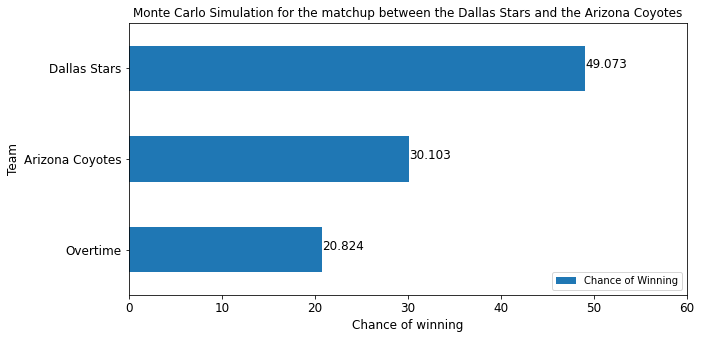

Dallas Stars chances of winning: 49.073 % 
Arizona Coyotes chances of winning: 30.103 % 
Percent chance the game will go to overtime: 20.824 % 
 
 Low Danger shots per game by Dallas Stars: 9 
 
 Medium Danger shots per game by Dallas Stars: 7 
 
 High Danger shots per game by Dallas Stars: 7 
 
 Low Danger shots per game by Arizona Coyotes: 8 
 
 Medium Danger shots per game by Arizona Coyotes: 5 
 
 High Danger shots per game by Arizona Coyotes: 5 
 
 Goals per game scored by the Dallas Stars: 2.31001 
 
 Goals per game scored by the Arizona Coyotes: 1.83769 
 
 Low danger goals per game scored by Dallas Stars: 0.0662 
 
 Medium danger goals per game scored by Dallas Stars: 0.73755 
 
 High danger goals per game scored by Dallas Stars: 1.50626 
 
 Low danger goals per game scored by Arizona Coyotes: 0.34074 
 
 Medium danger goals per game scored by Arizona Coyotes: 0.59698 
 
 High danger goals per game scored by Arizona Coyotes: 0.89997 
 
 Percent of total goals scored on Low dang

In [60]:
monte_carlo_matchup('Dallas Stars', 'Arizona Coyotes')

,Chance of Winning
Team,
San Jose Sharks,17.721
Colorado Avalanche,66.508
Overtime,15.771


<Figure size 432x288 with 0 Axes>

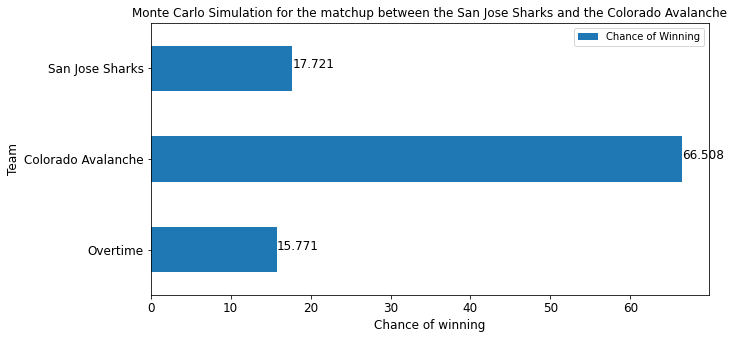

San Jose Sharks chances of winning: 17.721 % 
Colorado Avalanche chances of winning: 66.508 % 
Percent chance the game will go to overtime: 15.771 % 
 
 Low Danger shots per game by San Jose Sharks: 7 
 
 Medium Danger shots per game by San Jose Sharks: 5 
 
 High Danger shots per game by San Jose Sharks: 6 
 
 Low Danger shots per game by Colorado Avalanche: 12 
 
 Medium Danger shots per game by Colorado Avalanche: 8 
 
 High Danger shots per game by Colorado Avalanche: 7 
 
 Goals per game scored by the San Jose Sharks: 1.76837 
 
 Goals per game scored by the Colorado Avalanche: 3.158 
 
 Low danger goals per game scored by San Jose Sharks: 0.20642 
 
 Medium danger goals per game scored by San Jose Sharks: 0.69278 
 
 High danger goals per game scored by San Jose Sharks: 0.86917 
 
 Low danger goals per game scored by Colorado Avalanche: 0.56138 
 
 Medium danger goals per game scored by Colorado Avalanche: 1.02253 
 
 High danger goals per game scored by Colorado Avalanche: 1.574

In [61]:
monte_carlo_matchup('San Jose Sharks', 'Colorado Avalanche')

,Chance of Winning
Team,
Vegas Golden Knights,52.581
Montreal Canadiens,27.876
Overtime,19.543


<Figure size 432x288 with 0 Axes>

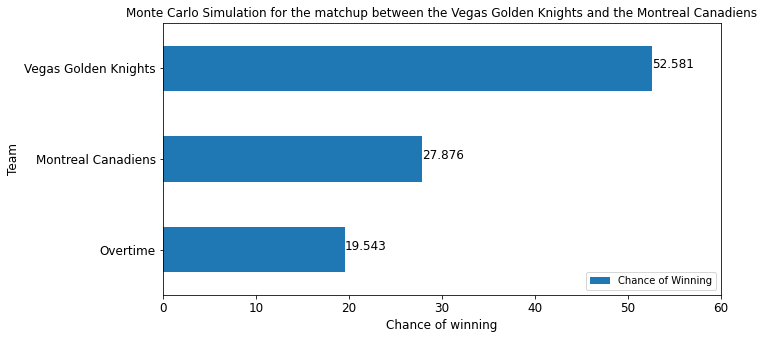

Vegas Golden Knights chances of winning: 52.581 % 
Montreal Canadiens chances of winning: 27.876 % 
Percent chance the game will go to overtime: 19.543 % 
 
 Low Danger shots per game by Vegas Golden Knights: 9 
 
 Medium Danger shots per game by Vegas Golden Knights: 6 
 
 High Danger shots per game by Vegas Golden Knights: 6 
 
 Low Danger shots per game by Montreal Canadiens: 10 
 
 Medium Danger shots per game by Montreal Canadiens: 6 
 
 High Danger shots per game by Montreal Canadiens: 6 
 
 Goals per game scored by the Vegas Golden Knights: 2.53878 
 
 Goals per game scored by the Montreal Canadiens: 1.90377 
 
 Low danger goals per game scored by Vegas Golden Knights: 0.25114 
 
 Medium danger goals per game scored by Vegas Golden Knights: 0.94144 
 
 High danger goals per game scored by Vegas Golden Knights: 1.3462 
 
 Low danger goals per game scored by Montreal Canadiens: 0.20916 
 
 Medium danger goals per game scored by Montreal Canadiens: 0.49349 
 
 High danger goals per

In [62]:
monte_carlo_matchup('Vegas Golden Knights', 'Montreal Canadiens')

,Chance of Winning
Team,
Anaheim Ducks,34.264
Edmonton Oilers,46.522
Overtime,19.214


<Figure size 432x288 with 0 Axes>

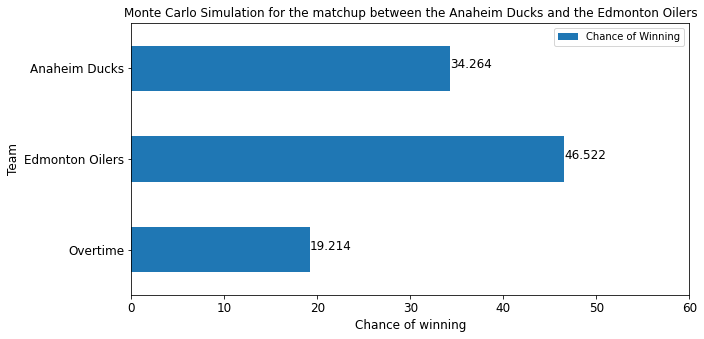

Anaheim Ducks chances of winning: 34.264 % 
Edmonton Oilers chances of winning: 46.522 % 
Percent chance the game will go to overtime: 19.214 % 
 
 Low Danger shots per game by Anaheim Ducks: 9 
 
 Medium Danger shots per game by Anaheim Ducks: 7 
 
 High Danger shots per game by Anaheim Ducks: 6 
 
 Low Danger shots per game by Edmonton Oilers: 9 
 
 Medium Danger shots per game by Edmonton Oilers: 7 
 
 High Danger shots per game by Edmonton Oilers: 7 
 
 Goals per game scored by the Anaheim Ducks: 2.30139 
 
 Goals per game scored by the Edmonton Oilers: 2.63596 
 
 Low danger goals per game scored by Anaheim Ducks: 0.30316 
 
 Medium danger goals per game scored by Anaheim Ducks: 0.78263 
 
 High danger goals per game scored by Anaheim Ducks: 1.2156 
 
 Low danger goals per game scored by Edmonton Oilers: 0.1322 
 
 Medium danger goals per game scored by Edmonton Oilers: 1.05648 
 
 High danger goals per game scored by Edmonton Oilers: 1.44728 
 
 Percent of total goals scored on L

In [63]:
monte_carlo_matchup('Anaheim Ducks', 'Edmonton Oilers')

,Chance of Winning
Team,
Philadelphia Flyers,21.542
New York Islanders,60.578
Overtime,17.880


<Figure size 432x288 with 0 Axes>

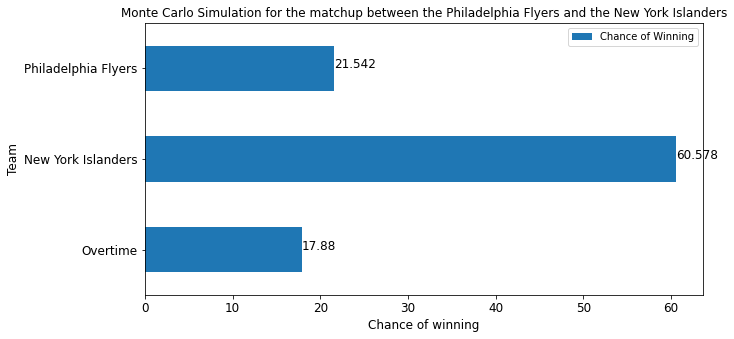

Philadelphia Flyers chances of winning: 21.542 % 
New York Islanders chances of winning: 60.578 % 
Percent chance the game will go to overtime: 17.88 % 
 
 Low Danger shots per game by Philadelphia Flyers: 11 
 
 Medium Danger shots per game by Philadelphia Flyers: 6 
 
 High Danger shots per game by Philadelphia Flyers: 5 
 
 Low Danger shots per game by New York Islanders: 9 
 
 Medium Danger shots per game by New York Islanders: 5 
 
 High Danger shots per game by New York Islanders: 8 
 
 Goals per game scored by the Philadelphia Flyers: 1.84217 
 
 Goals per game scored by the New York Islanders: 2.89213 
 
 Low danger goals per game scored by Philadelphia Flyers: 0.21217 
 
 Medium danger goals per game scored by Philadelphia Flyers: 0.49079 
 
 High danger goals per game scored by Philadelphia Flyers: 1.13921 
 
 Low danger goals per game scored by New York Islanders: 0.39509 
 
 Medium danger goals per game scored by New York Islanders: 0.64505 
 
 High danger goals per game sc

In [64]:
monte_carlo_matchup('Philadelphia Flyers', 'New York Islanders')

#### Simulations are running great! 

Let's see how my basic model compares to a collaboration of some of the best modelers on Twitter for the 3rd round the recent NHL players.

,Chance of Winning
Team,
Vegas Golden Knights,52.569
Montreal Canadiens,27.597
Overtime,19.834


<Figure size 432x288 with 0 Axes>

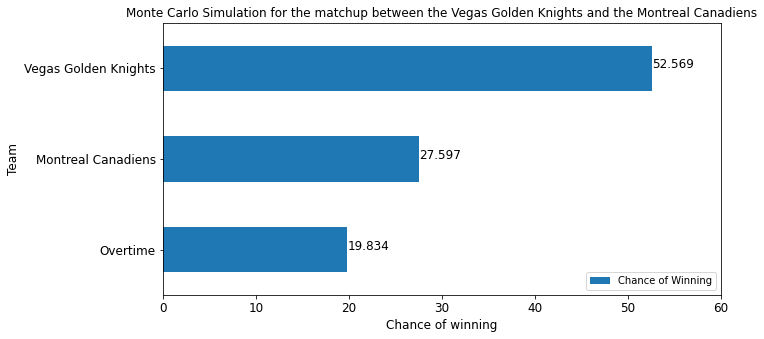

Vegas Golden Knights chances of winning: 52.569 % 
Montreal Canadiens chances of winning: 27.597 % 
Percent chance the game will go to overtime: 19.834 % 
 
 Low Danger shots per game by Vegas Golden Knights: 9 
 
 Medium Danger shots per game by Vegas Golden Knights: 6 
 
 High Danger shots per game by Vegas Golden Knights: 6 
 
 Low Danger shots per game by Montreal Canadiens: 10 
 
 Medium Danger shots per game by Montreal Canadiens: 6 
 
 High Danger shots per game by Montreal Canadiens: 6 
 
 Goals per game scored by the Vegas Golden Knights: 2.53543 
 
 Goals per game scored by the Montreal Canadiens: 1.90219 
 
 Low danger goals per game scored by Vegas Golden Knights: 0.24877 
 
 Medium danger goals per game scored by Vegas Golden Knights: 0.9465 
 
 High danger goals per game scored by Vegas Golden Knights: 1.34016 
 
 Low danger goals per game scored by Montreal Canadiens: 0.21184 
 
 Medium danger goals per game scored by Montreal Canadiens: 0.4938 
 
 High danger goals per 

In [65]:
monte_carlo_matchup('Vegas Golden Knights', 'Montreal Canadiens')

,Chance of Winning
Team,
Tampa Bay Lightning,38.208
New York Islanders,39.686
Overtime,22.106


<Figure size 432x288 with 0 Axes>

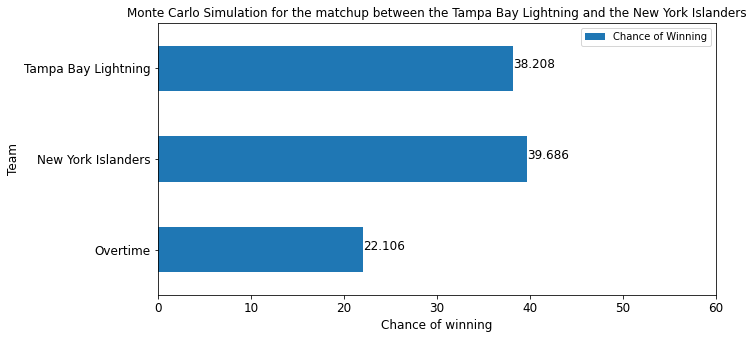

Tampa Bay Lightning chances of winning: 38.208 % 
New York Islanders chances of winning: 39.686 % 
Percent chance the game will go to overtime: 22.106 % 
 
 Low Danger shots per game by Tampa Bay Lightning: 10 
 
 Medium Danger shots per game by Tampa Bay Lightning: 7 
 
 High Danger shots per game by Tampa Bay Lightning: 6 
 
 Low Danger shots per game by New York Islanders: 7 
 
 Medium Danger shots per game by New York Islanders: 6 
 
 High Danger shots per game by New York Islanders: 7 
 
 Goals per game scored by the Tampa Bay Lightning: 1.89618 
 
 Goals per game scored by the New York Islanders: 1.93741 
 
 Low danger goals per game scored by Tampa Bay Lightning: 0.32688 
 
 Medium danger goals per game scored by Tampa Bay Lightning: 0.32768 
 
 High danger goals per game scored by Tampa Bay Lightning: 1.24162 
 
 Low danger goals per game scored by New York Islanders: 0.22528 
 
 Medium danger goals per game scored by New York Islanders: 0.56988 
 
 High danger goals per game s

In [66]:
monte_carlo_matchup('Tampa Bay Lightning', 'New York Islanders')

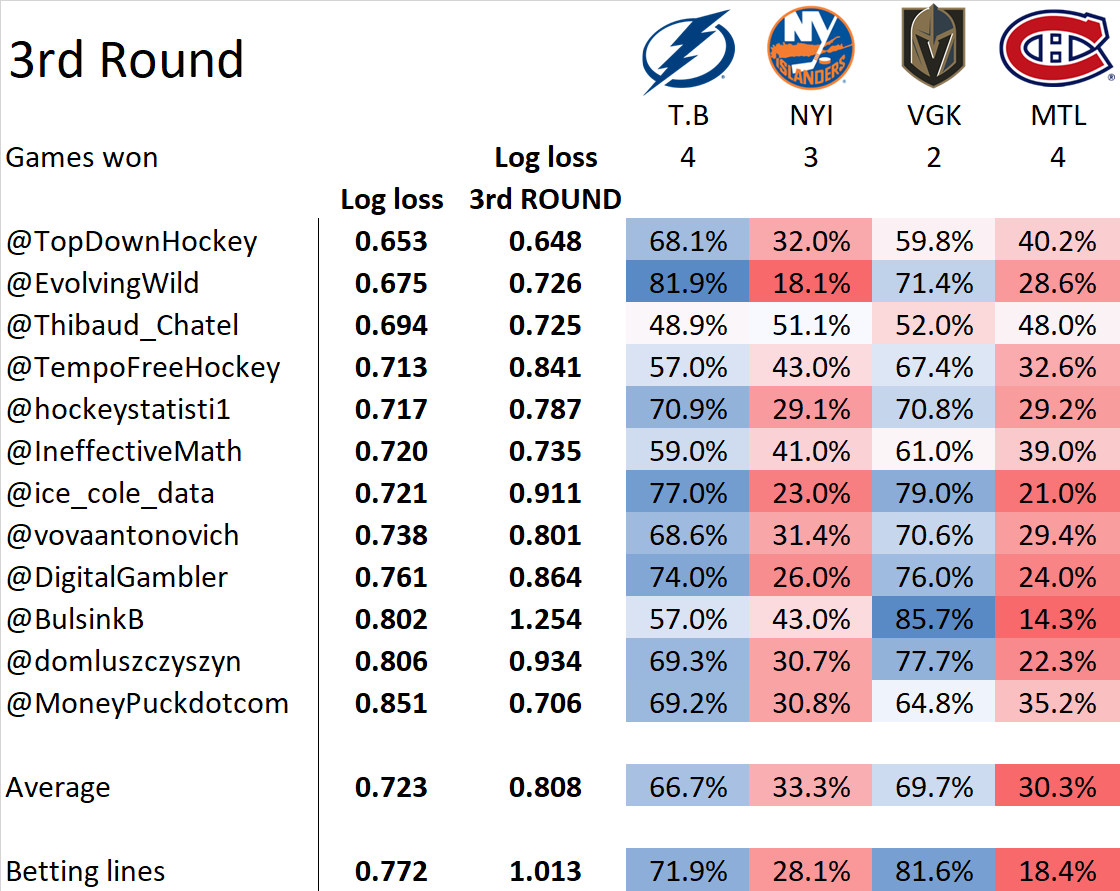

Interestingly, my model seemed to have favored the New York Islanders much more than most of the other models. Actually favoring them to win 39% of the time, while Tampa was favored to win only 38% of the time. My model also heavily favored Vegas over the Montreal Canadiens 52% to 28%. One clear distinction between my models and these is that I have not yet corrected for overtime games and odds in those games. Still, I am quite happy with my basic model and how it compares with these more established models. 

Credit to [hockey-statistics](https://twitter.com/hockeystatisti1) who compiled these on Twitter. 

## Simulation to Use in Pro Scouting

,Chance of Winning
Team,
Toronto Maple Leafs,57.155
Montreal Canadiens,23.968
Overtime,18.877


<Figure size 432x288 with 0 Axes>

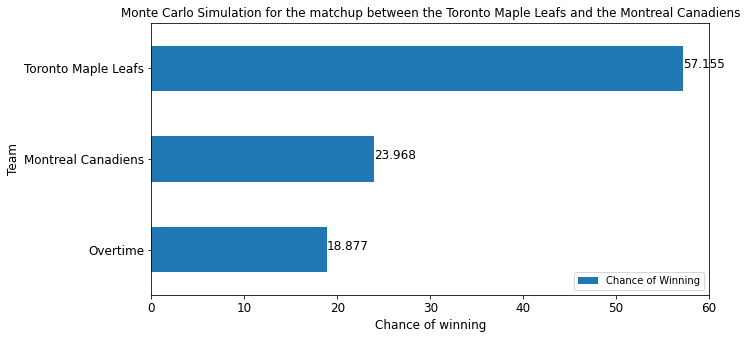

Toronto Maple Leafs chances of winning: 57.155 % 
Montreal Canadiens chances of winning: 23.968 % 
Percent chance the game will go to overtime: 18.877 % 
 
 Low Danger shots per game by Toronto Maple Leafs: 8 
 
 Medium Danger shots per game by Toronto Maple Leafs: 7 
 
 High Danger shots per game by Toronto Maple Leafs: 7 
 
 Low Danger shots per game by Montreal Canadiens: 11 
 
 Medium Danger shots per game by Montreal Canadiens: 6 
 
 High Danger shots per game by Montreal Canadiens: 5 
 
 Goals per game scored by the Toronto Maple Leafs: 2.69001 
 
 Goals per game scored by the Montreal Canadiens: 1.82274 
 
 Low danger goals per game scored by Toronto Maple Leafs: 0.18384 
 
 Medium danger goals per game scored by Toronto Maple Leafs: 0.99719 
 
 High danger goals per game scored by Toronto Maple Leafs: 1.50898 
 
 Low danger goals per game scored by Montreal Canadiens: 0.32552 
 
 Medium danger goals per game scored by Montreal Canadiens: 0.38858 
 
 High danger goals per game s

In [67]:
monte_carlo_matchup('Toronto Maple Leafs', 'Montreal Canadiens')

## Analyzing Our Findings: 

The simulations are working great and we are getting lots of good info about each teams' chances against one another. We can see in the final simulation between Toronto and Montreal that the vast majority of their goals were scored on high danger shots. Let's look at some visualizations of the teams' relative save percentages and see why this might be. 

Text(0.5, 1.0, 'Low Danger Save Percentages by Team')

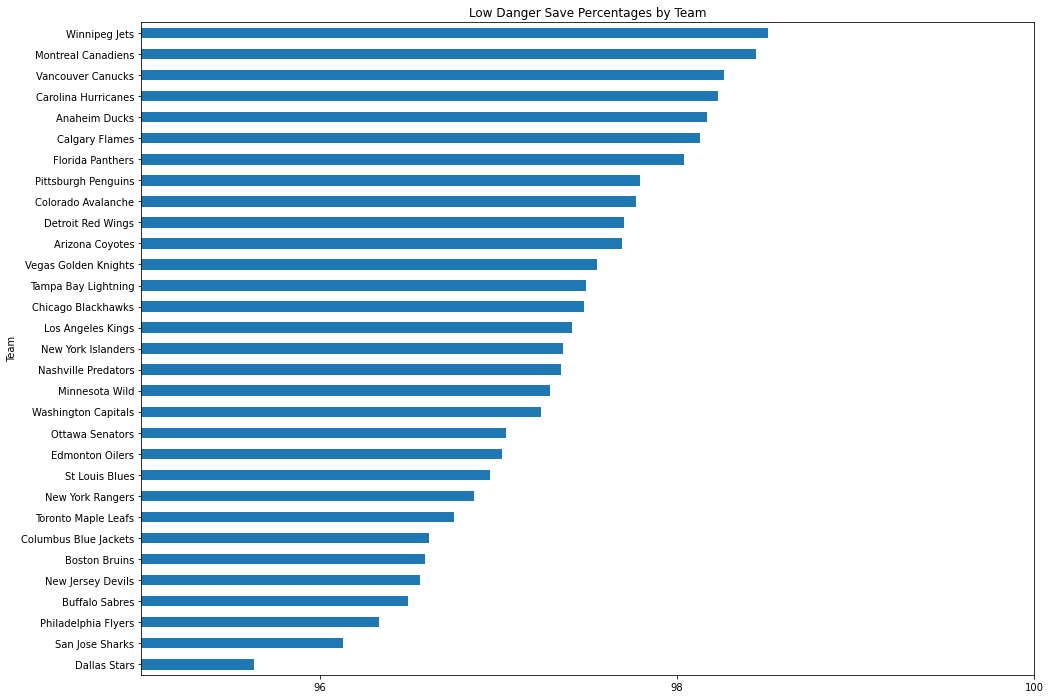

In [71]:
Monte_carlo_df['LDSV%'].sort_values().plot(kind='barh', figsize=(16,12), xticks = (np.arange(80, 110, step=2)), xlim=([95,100]))
plt.title('Low Danger Save Percentages')

On low danger shots Montreal is one of the best teams in the NHL, which explains why Toronto was only projected to score 6% of their total goals on low danger shots. 

Toronto on the other hand is one of the worst teams in the league on low danger shots against, which explains why Montreal scored nearly 18% of their goals on low danger shots in the simulation. 

Text(0.5, 1.0, 'Medium Danger Save Percentages')

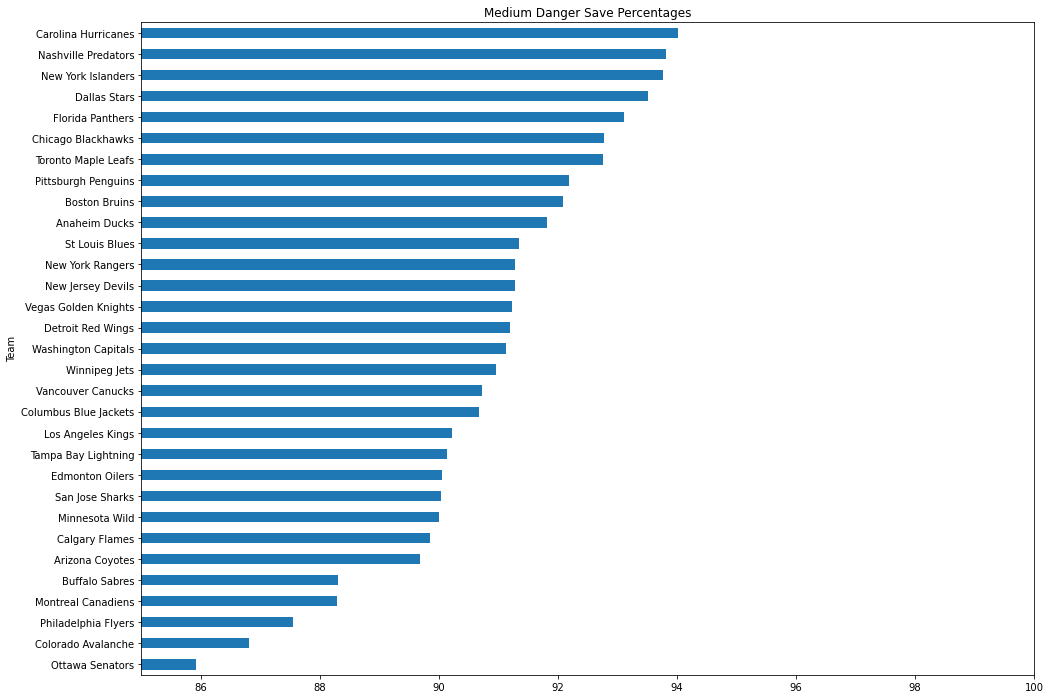

In [72]:
Monte_carlo_df['MDSV%'].sort_values().plot(kind='barh', figsize=(16,12), xticks = (np.arange(80, 110, step=2)), xlim=([85,100]))
plt.title('Medium Danger Save Percentages')

Toronto's Medium danger save percentage is very good, illustrating why Montreal only scored 21% of their goals on medium danger shots. 

Montreal on the other hand is quite poor in terms of medium danger save percentage, allowing Toronto to score 37% of their goals on medium danger shots. 

Text(0.5, 1.0, 'High Danger Save Percentages')

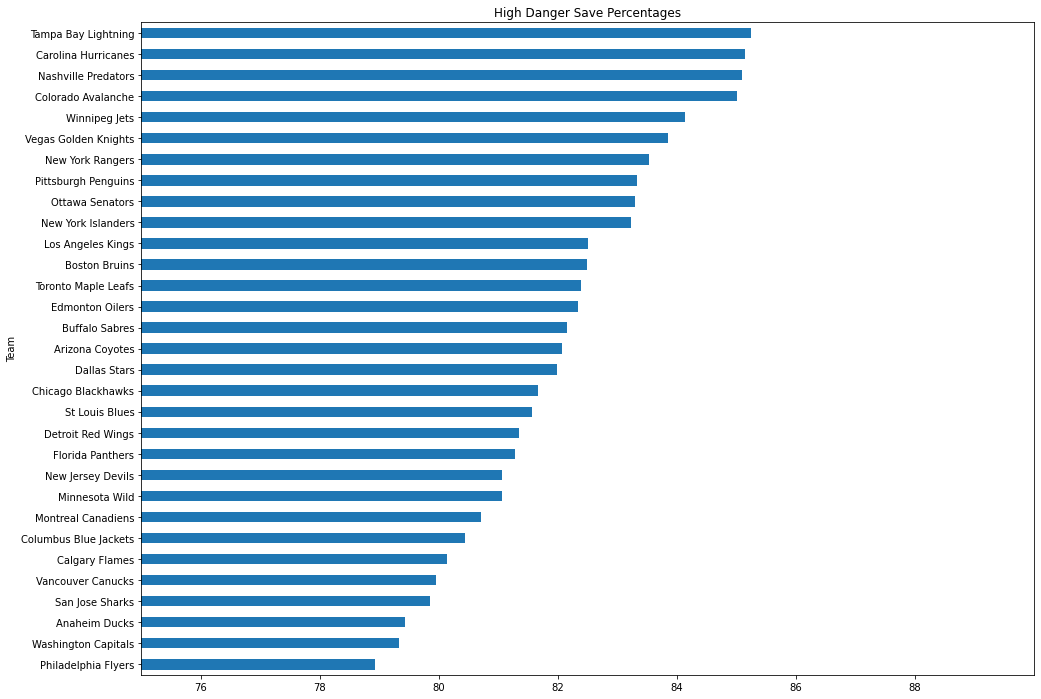

In [73]:
Monte_carlo_df['HDSV%'].sort_values().plot(kind='barh', figsize=(16,12), xticks = (np.arange(70, 90, step=2)), xlim=([75,90]))
plt.title('High Danger Save Percentages')

Finally, with high dangers shots, we see Toronto around league average, and Montreal scored nearly 61% of their goals in the simulation on high danger shots. 

Toronto scored at a high percentage as well at over 56%, and we can see that Montreal is near the bottom of the league.

It's important to note that high danger chances do tend to generate the most goals overall. The league average save percentage on high danger chances is only 82.07%. 

Toronto is heavily favored in this matchup; they generate more high and medium danger shots per game than Montreal, and score .8 more goals per game than Montreal does. 

## Applications in Pro Scouting:
So what can a team do with these statistics? That is where I see value in using a tool like this for pro scouting. Each team can identify both their strengths and weaknesses, and the strengths and weaknesses of their opponents, to formulate an offensive and defensive gameplan. 

Using Montreal and Toronto again, we know that both teams will want to protect the high danger areas because that is where the majority of goals are scored. Outside of that, would it make more sense for Montreal to focus entirely on limiting all shots that are both medium and high danger? Their goaltending is excellent at making low danger saves, so they would actually be playing to their strengths by forcing Toronto to shoot from the outside. They would also be forcing Toronto away from their primary source of scoring. 

Conversely, Toronto should play to the strengths of their own goalie, and try to protect from high danger shots and low danger shots as their medium danger save percentage is very good. From an offensive standpoint, they should push very hard to only take medium and high danger shots, and avoid low danger shots when possible, thereby taking away one of Montreal's strengths. 

Beyond that, I think that a simulation like this is a good way to isolate exploitable factors for each team to help them on a game by game basis. 

From here I would like to refine the model, add more factors besides expected save percentages and shot totals, and see if I can fine tune the predicitions and useful statistics even further. 

## Next Steps:

As I continue to refine this model, I would also like to build a player valuation model. The world of hockey statistics is growing and there will always be new stats added that can hopefully create more accurate evaluations. After building a player valuation model I hope to add the individual player impacts on each game into the Monte Carlo simulations to grow the intricacies even further. Along with that I'd like to add home ice advantage, days of rest, and add weights for each of those. I'd also like to build functions for tracking daily changes in all stat and alterations in lineups and rosters. Finally, I would really like to build a line generator that creates the best 3 forward line combination. 

## Conclusions:

    --There is a lot of data out there that can be used to help with the analysis of hockey.
    --Using a basic Monte Carlo simulation created a relatively competitive model compared to others on Twitter.
    --There is a lot more to build to create a highly effective model.
    --Building a detailed function from scratch is a fun and challenging endeavor.
    --Even the most basic hockey statistics can be useful for evaluation of teams. 
    --This has solidified my belief that I would enjoy working in sports analytics.
        --I will focus my job search to try to work in this field.

This was an incredibly fun introduction into the world of hockey analytics. I am so excited to dig deeper and learn more every day! 

